In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Basic Data Exploration

In [4]:
df = pd.read_csv('temperatures/temperature.csv')

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df['date']=df['datetime'].dt.date

#### Discussion

1. Why is this called "exponential"? (Try writing out what the first few terms work out to be)
    * Exponential method is one of the forecasting methods. It is a technique used to detect significant changes in data by considering the most recent data. Prediction is a weighted sum of past observations, but the model explicitly uses an exponentially decreasing weight for past observations.
    * These are the smoothed values from below example:array([287.17, 287.17,287.17160921, 287.17761545,287.18757901, 287.20110417])

2. What happens if you make the "factor" in the code much smaller? Try .01, .001.
    * very smooth line , shifted a little bit, takes a while for data to respond to changes, see the plot below with factor 0.001

3. Do you expect this to be faster or slower than implementing a rolling average?
    * it is much slower than rolling average

4. Try running the two methods - you can even use the time module to measure performance.  Which method is faster?
    * rolling is faster
    * measure the performance of the code - use time module as below

5. In applications where you want to smooth data as it arrives in real time, it's very common to use exponential smoothing instead of a rolling average - why do you think this might be?
    * It gives more significance to recent observations
    * It gives more accurate result than other methods


In [7]:
import time

In [9]:
display(df["Boston"])
print(df.iloc[1]['Boston'])
print(df.iloc[0]['Boston'])

0               NaN
1        287.170000
2        287.186092
3        287.231672
4        287.277251
            ...    
45248    288.080000
45249    286.020000
45250    283.940000
45251    282.170000
45252    280.650000
Name: Boston, Length: 45253, dtype: float64

287.17
nan


In [16]:
#Question 1
smoothed_boston1 = np.zeros(6)

factor = 0.1

for k in range(6):
    if k == 0:
        smoothed_boston1[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston1[k]=smoothed_boston1[k-1]
        else:
            smoothed_boston1[k] = (1-factor)*smoothed_boston1[k-1] + factor*current_data
            
smoothed_boston1

array([287.17      , 287.17      , 287.17160921, 287.17761545,
       287.18757901, 287.20110417])

In [21]:
#Question 2,3,4
start = time.perf_counter()
smoothed_boston = np.zeros(len(df)-1)

factor = 0.1

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston[k]=df.iloc[1]['Boston']
        
    else:
        current_data = df.iloc[k]['Boston']
        
        if np.isnan(current_data):
            smoothed_boston[k]=smoothed_boston[k-1]
        else:
            smoothed_boston[k] = (1-factor)*smoothed_boston[k-1] + factor*current_data
            
end = time.perf_counter()
elapsed_time_exponential = end - start
print("Elapsed time for exponential method is:", elapsed_time_exponential)

Elapsed time for exponential method is: 12.953259699999762


In [22]:
start = time.perf_counter()
df['Boston'].rolling(1000).mean()
end = time.perf_counter()
elapsed_time_rolling = end - start
print("Elapsed time for rolling method is:", elapsed_time_rolling)

if elapsed_time_rolling < elapsed_time_exponential:
    print("rolling method is faster")
else:
    print("exponential method is faster")

Elapsed time for rolling method is: 0.4612964000007196
rolling method is faster


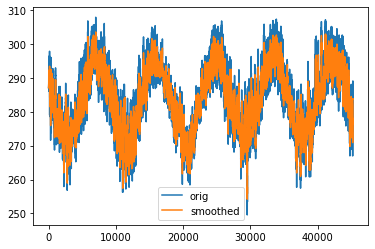

In [23]:
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston, label='smoothed with factor 0.1')
plt.legend()

In [17]:

smoothed_boston1 = np.zeros(len(df)-1)

factor = 0.001

for k in range(len(df)-1):
    if k == 0:
        smoothed_boston1[k]=df.iloc[1]['Boston']
    else:
        current_data = df.iloc[k]['Boston']
        if np.isnan(current_data):
            smoothed_boston1[k]=smoothed_boston1[k-1]
        else:
            smoothed_boston1[k] = (1-factor)*smoothed_boston1[k-1] + factor*current_data
            
smoothed_boston1

array([287.17      , 287.17      , 287.17001609, ..., 284.62870276,
       284.62801406, 284.62555604])

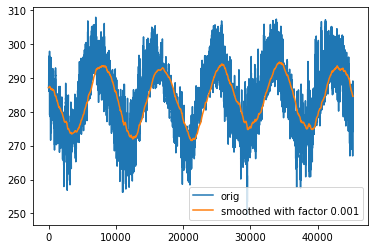

In [18]:
plt.plot(df['Boston'], label='orig')
plt.plot(smoothed_boston1, label='smoothed with factor 0.001')
plt.legend()

In [23]:
#Question 1 trying example
num_list = [10,20,30,40,50,60]
sample_df = pd.DataFrame(num_list)
display(sample_df)

smoothed = np.zeros(len(num_list)-1)
print(sample_df.iloc[1][0])

factor = 0.1

for k in range(len(num_list)-1):
    if k == 0:
        smoothed[k]=sample_df.iloc[1][0]
    else:
        current_data = sample_df.iloc[k][0]
        if np.isnan(current_data):
            smoothed[k]=smoothed[k-1]
        else:
            smoothed[k] = (1-factor)*smoothed[k-1] + factor*current_data
            
smoothed

,0
0,10
1,20
2,30
3,40
4,50
5,60


20


array([20.  , 20.  , 21.  , 22.9 , 25.61])